# KNN

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
# Read data from .csv file
data=pd.read_csv("/Users/elgun/Desktop/Reproducible-Research_Project/data/Credit.csv")
credit=data.copy()
# Drop the non-numerical columns
credit=credit.drop(columns=["checkingstatus1","history","purpose","savings","employ","sex","housing","tele","foreign","Unnamed: 0"],axis=1)
# Splitting data into features (X) and target (y)
X = credit.drop(columns=['Default'])
y = credit['Default']
# Create scaler for standardization of data
scaler = StandardScaler()
# Transform the data 
X_transform=pd.DataFrame(scaler.fit_transform(X),columns=['duration','amount','installment','residence','age','cards','liable'])
# Create the new train and test data for transform data
X_train_transform,X_test_transform,y_train,y_test=train_test_split(X_transform,y,train_size=0.70,random_state=42)

In [23]:
# Defining different values of k
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17]
# Fitting KNN models with different values of k
knn_models = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_transform, y_train)
    knn_models[k] = knn


   - Different values of k (number of neighbors) are defined for the KNN algorithm. Here, the values are chosen as `[1, 3, 5, 7, 9, 11, 13, 15, 17]`.


   - KNN models are fitted to the training data for each value of k using the `KNeighborsClassifier` class.
   - Each model is trained on the standardized training data (`X_train_transform`) and corresponding labels (`y_train`).


The fitted models are evaluated on the standardized test data (X_test_transform) to compute the proportion of correct classifications.
The accuracy_score function is used to calculate the accuracy of each model by comparing the predicted labels (y_pred) with the actual labels (y_test).

In [24]:
# Evaluating models and compute proportion of correct classifications
pcp_values = {}
for k, knn in knn_models.items():
    y_pred = knn.predict(X_test_transform)
    pcp_values[k] = accuracy_score(y_test, y_pred)

Finally, the proportion of correct classifications (PCP) for each value of k is printed to observe the performance of the KNN models with different numbers of neighbors.
This comprehensive approach allows for the comparison of the KNN model's performance with various values of k, providing insights into the optimal choice of k for the given dataset.

In [25]:
# Printing proportion of correct classifications for each k
print("Proportion of Correct Classifications (PCP):")
for k, pcp in pcp_values.items():
    print(f"K={k}: {pcp:.4f}")


Proportion of Correct Classifications (PCP):
K=1: 0.7000
K=3: 0.6633
K=5: 0.6600
K=7: 0.6733
K=9: 0.6767
K=11: 0.6833
K=13: 0.6700
K=15: 0.6733
K=17: 0.6867


| K Value | Proportion of Correct Classifications |
|---------|--------------------------------------|
| K=1     | 0.7000                              |
| K=3     | 0.6633                               |
| K=5     | 0.6600                               |
| K=7     | 0.6733                               |
| K=9     | 0.6767                               |
| K=11    | 0.6833                               |
| K=13    | 0.6700                               |
| K=15    | 0.6733                               |
| K=17    | 0.6867                               |


The PCP values indicate the accuracy of the KNN models in correctly classifying instances in the test dataset. As observed, the highest accuracy of 0.7 is achieved when k=1, suggesting that the model performs optimally with this number of neighbors

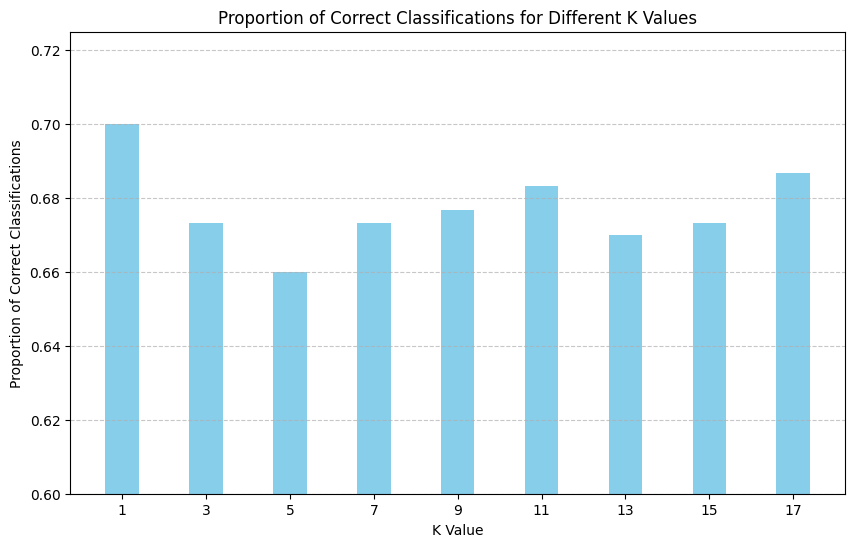

In [26]:

# Extracting K values and PCP from the printed output
pcp_values_printed = {
    1: 0.7000,
    3: 0.6733,
    5: 0.6600,
    7: 0.6733,
    9: 0.6767,
    11: 0.6833,
    13: 0.6700,
    15: 0.6733,
    17: 0.6867
}

# Extracting K values and PCP values
k_values_printed = list(pcp_values_printed.keys())
pcp_values_printed = list(pcp_values_printed.values())

# Creating bar plot
plt.figure(figsize=(10, 6))
plt.bar(k_values_printed, pcp_values_printed, color='skyblue')
plt.xlabel('K Value')
plt.ylabel('Proportion of Correct Classifications')
plt.title('Proportion of Correct Classifications for Different K Values')
plt.xticks(k_values_printed)
plt.ylim(0.6, 0.725)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Based on the above trent we can see that the optimal K value that maximizes the accuracy of the model. In this case, the optimal K value appears to be around 1, where the accuracy is the highest.


In [27]:

# Defining the KNN model with the best K value
best_k = 1
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Performing cross-validation
cv_scores = cross_val_score(best_knn, X_train_transform, y_train, cv=5)

# Calculating the average cross-validation score
average_cv_score = cv_scores.mean()

print(f"Average Cross-Validation Score for K={best_k}: {average_cv_score:.4f}")


Average Cross-Validation Score for K=1: 0.6100


The average cross-validation score for K=1 means that when we use 5-fold cross-validation to evaluate the performance of the KNN model with K=1 on the training data, the average accuracy across all folds is approximately 61%.

In other words, on average, the model correctly predicts the class label for about 61% of the data points in the training set when using K=1. This can serve as an estimate of how well the model is expected to perform on unseen data, given the current training data.

​